In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Homework 2

## 4 (A) Selecting a pair of stereo images

Take a pair of stereo images, one image, denoted as $S_L(x, y)$, is for the left eye, and one $S_R(x, y)$ for the right eye. Here $x$ and $y$ are the coordinates of the image pixel locations. For example $x = 1, 2, ..., 256$ and $y = 1, 2, ..., 256$. You may find some examples online, for example at this website https://www.londonstereo.com/3- D-gallery1.html. If the original images are colored, remove the color. Plot out the images, each as a luminance image.

In [17]:
left = imread("resources/eye1.png")
right = imread("resources/eye2.png")

In [25]:
def plot_left_and_right(left, right, apply_lim = False):
    max_lim = np.max(np.abs([left, right]))
    
    plt.subplot(1, 2, 1)
    if apply_lim:
        plt.imshow(left, cmap = "gray", vmin = -max_lim, vmax = max_lim)
    else:
        plt.imshow(left, cmap = "gray")
    plt.colorbar(fraction = 0.046, pad = 0.04)
    
    plt.subplot(1, 2, 2)
    if apply_lim:
        plt.imshow(right, cmap = "gray", vmin = -max_lim, vmax = max_lim)
    else:
        plt.imshow(right, cmap = "gray")
    plt.colorbar(fraction = 0.046, pad = 0.04)
    
    plt.tight_layout()
    plt.show()

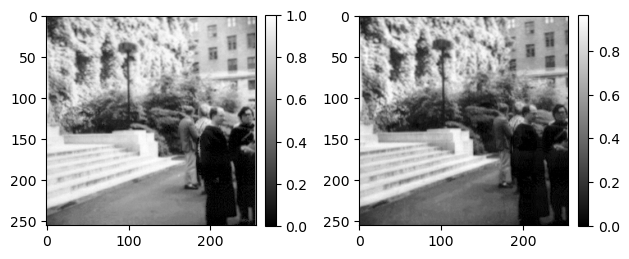

In [26]:
plot_left_and_right(left, right)

## 4 (B) Normalizing the images

Please normalize each image as follows. For $S_i(x, y)$, with $i = L$ or $i = R$, find $S_i^{min}$ and $S_i^{max}$ as the mininum and maximum of $S_i(x, y)$ across all pixel locations $(x, y)$. Then, for $\hat{S} = 255$, do

$$S_i(x, y) \rightarrow \hat{S} \frac{S_i(x, y) - S_i^{min}}{{S_i^{max} - S_i^{min}}$$

Now $0 \leq S_i(x, y) \leq \hat{S}$. Round each $S_i(x, y)$ into an integer value so that $S_i(x, y)$ is an integer between $0$ and $\hat{S}$.

In [31]:
def normalize(image, s_bar = 255):
    s_min = np.min(image)
    s_max = np.max(image)

    image = s_bar * (image - s_min) / (s_max - s_min)
    image = np.round(image)
    
    return image

In [32]:
left = normalize(left)
right = normalize(right)

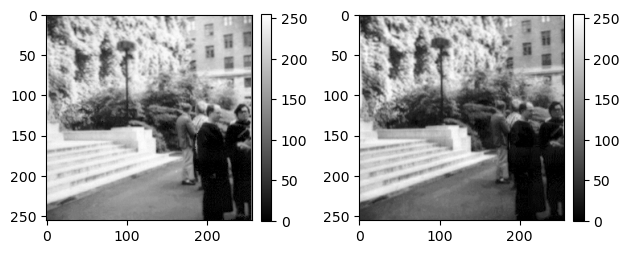

In [33]:
plot_left_and_right(left, right)